In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [100]:
FX_exp_df = pd.read_excel('Treasury_Analyst_-_Assignment.xlsx')
FX_Rate_df = pd.read_excel('Treasury_Analyst_-_Assignment.xlsx',sheet_name='Rates')
hedge_df = pd.read_excel('Treasury_Analyst_-_Assignment.xlsx',sheet_name='Hedge')

In [101]:
FX_exp_df.head()

,TransferId,TimeStamp,FromCcy,ToCcy,FromCcyAmount
0,3456765,2017-09-05 12:00:00,EUR,GBP,5900
1,3456766,2017-09-05 12:03:00,GBP,EUR,5500
2,3456767,2017-09-05 12:03:53,EUR,GBP,6500
3,3456768,2017-09-05 12:09:22,EUR,GBP,5400
4,3456769,2017-09-05 12:10:55,GBP,EUR,5200


In [102]:
FX_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransferId     198 non-null    int64         
 1   TimeStamp      198 non-null    datetime64[ns]
 2   FromCcy        198 non-null    object        
 3   ToCcy          198 non-null    object        
 4   FromCcyAmount  198 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.9+ KB


In [103]:
FX_Rate_df.head()

,TimeStamp,EUR/GBP
0,2017-09-05 12:00:00,0.8474
1,2017-09-05 12:03:00,0.8481
2,2017-09-05 12:03:53,0.8472
3,2017-09-05 12:09:22,0.8477
4,2017-09-05 12:10:55,0.8485


In [104]:
FX_Rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TimeStamp  198 non-null    datetime64[ns]
 1   EUR/GBP    198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [105]:
hedge_df.head()

,TimeStamp,Ccy,Amount
0,2017-09-05 15:06:00,EUR,40000
1,2017-09-05 16:45:00,EUR,-20000
2,2017-09-05 17:20:00,EUR,10000
3,2017-09-05 20:27:00,EUR,10000
4,2017-09-05 21:37:00,EUR,20000


In [106]:
FX_exp_df.columns

Index(['TransferId', 'TimeStamp', 'FromCcy', 'ToCcy', 'FromCcyAmount'], dtype='object')

In [107]:
FX_exp_df.TimeStamp.max()

Timestamp('2017-09-05 23:23:34')

In [108]:
FX_Rate_df.columns

Index(['TimeStamp', 'EUR/GBP'], dtype='object')

In [109]:
FX_Rate_df.TimeStamp.max()

Timestamp('2017-09-05 23:23:34')

In [110]:
FX_Exposure_Rate = FX_exp_df.merge(FX_Rate_df, left_on = 'TimeStamp',right_on = 'TimeStamp')

In [111]:
FX_Exposure_Rate.shape[0] == FX_exp_df.shape[0]

True

In [112]:
FX_Exposure_Rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransferId     198 non-null    int64         
 1   TimeStamp      198 non-null    datetime64[ns]
 2   FromCcy        198 non-null    object        
 3   ToCcy          198 non-null    object        
 4   FromCcyAmount  198 non-null    int64         
 5   EUR/GBP        198 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 10.8+ KB


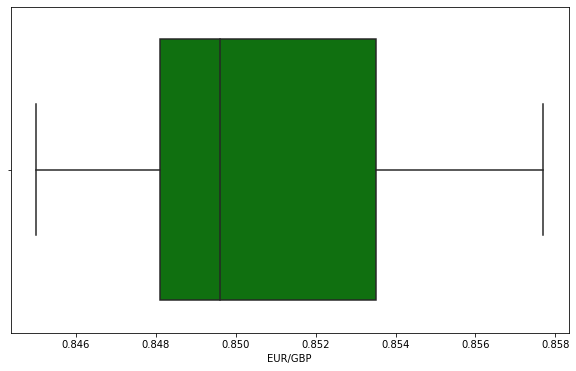

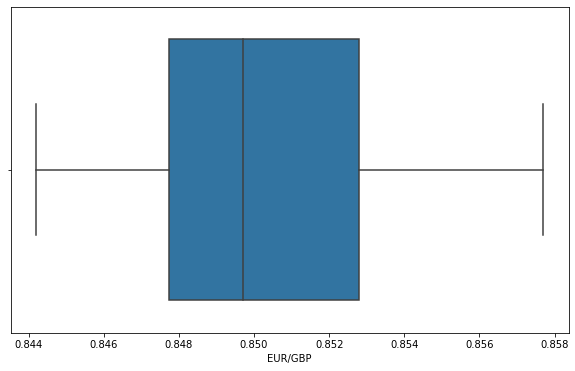

In [113]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='EUR']['EUR/GBP'], color = 'green')
plt.show()
fig = plt.figure(figsize = (10,6))
sns.boxplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='GBP']['EUR/GBP'])
plt.show()

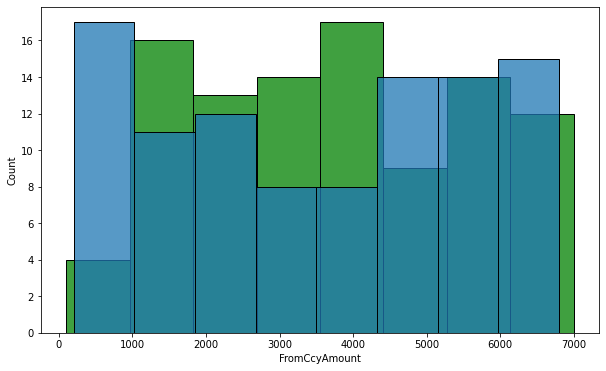

In [114]:
fig = plt.figure(figsize = (10,6))
sns.histplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='EUR']['FromCcyAmount'], color = 'green')
sns.histplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='GBP']['FromCcyAmount'])
plt.show()

#### * please assume none of the transactions were converted or paid out in this time

### Let's calculate the exposure for hours {1,2,3....24} from the time the transferId was created.

In [115]:
FX_Exposure_Rate.head()

,TransferId,TimeStamp,FromCcy,ToCcy,FromCcyAmount,EUR/GBP
0,3456765,2017-09-05 12:00:00,EUR,GBP,5900,0.8474
1,3456766,2017-09-05 12:03:00,GBP,EUR,5500,0.8481
2,3456767,2017-09-05 12:03:53,EUR,GBP,6500,0.8472
3,3456768,2017-09-05 12:09:22,EUR,GBP,5400,0.8477
4,3456769,2017-09-05 12:10:55,GBP,EUR,5200,0.8485


In [116]:
FX_Exposure_Rate['Exchange_Rate'] = [xr[1] if xr[0] == 'EUR' else 1/xr[1] for ind,xr in FX_Exposure_Rate[['FromCcy','EUR/GBP']].iterrows()]

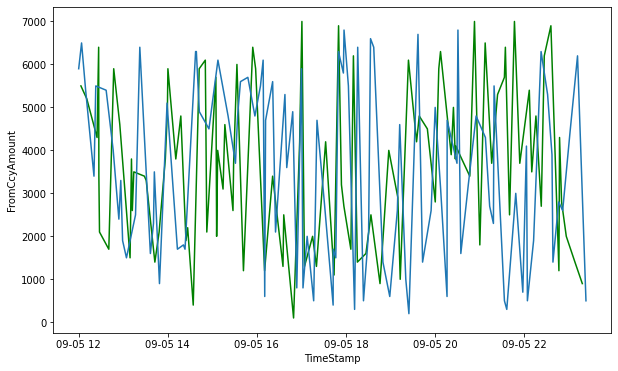

In [117]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='EUR']['TimeStamp'],FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='EUR']['FromCcyAmount'], color = 'green')
sns.lineplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='GBP']['TimeStamp'],FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='GBP']['FromCcyAmount'])
plt.show()

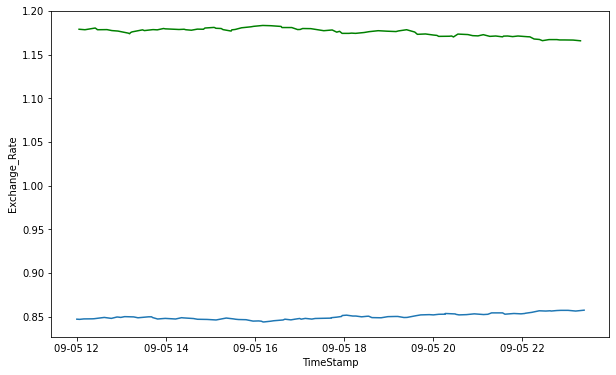

In [118]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='EUR']['TimeStamp'],FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='EUR']['Exchange_Rate'], color = 'green')
sns.lineplot(FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='GBP']['TimeStamp'],FX_Exposure_Rate[FX_Exposure_Rate.ToCcy=='GBP']['Exchange_Rate'])
plt.show()

In [119]:
import datetime as dt

1. What are the maximum and minimum exposures we have in EUR for this day (excluding the effect of hedge transactions)? 
2. Assuming we executed the hedge positions in the hedge table, what would our EUR exposure be at 22:00 ? 
3. What is the total P&L (profit or loss) for the company from all transactions at the end of the day? 
4. Please write an SQL query giving the first and last rate of every hour, and the total change of EUR exposure that hour (without hedge positions) 
5. Can you suggest a method to measure the risk associated with exposure on a given day? 6. Assuming there is a team in charge of hedging, how could they measure their own performance? (To find out if they are doing a better or worse job over time)

In [120]:
def trans_value_EUR(amount, exchange_rate, exchange_rate_later,ccy = 'EUR'):
    if ccy == 'EUR':
        return amount*exchange_rate/exchange_rate_later
    else:
        return amount*exchange_rate_later

## * Please assume none of the transactions were converted or paid out in this time

In [135]:
def calculateExposures(data_, position = -0.01): # position = -0.1 : rolling, integer : position
    data = data_.copy()
    exposures = []
    if position == -0.01:
        for ccy in ['EUR','GBP']:
            tempdf = data_[data_.FromCcy == ccy][['FromCcyAmount','Exchange_Rate']]
            if ccy == 'EUR':
                exposures.extend([[tempdf.iloc[i,0] - 
                                trans_value_EUR(
                                                tempdf.iloc[i,0],tempdf.iloc[i,1],tempdf.iloc[j,1],ccy) 
                                                for j in range(i+1,tempdf.shape[0])] 
                                                for i in range(tempdf.shape[0]-1)])
            else:
                exposures.extend([[tempdf.iloc[i,0]* tempdf.iloc[i,1] - 
                                trans_value_EUR(
                                                tempdf.iloc[i,0],tempdf.iloc[i,1],tempdf.iloc[j,1],ccy) 
                                                for j in range(i+1,tempdf.shape[0])] 
                                                for i in range(tempdf.shape[0]-1)])
    else:
        for ccy in ['EUR','GBP']:
            tempdf = data_[data_.FromCcy == ccy][['FromCcyAmount','Exchange_Rate']]
            if ccy == 'EUR':
                exposures.extend([tempdf.iloc[position,0] - 
                                trans_value_EUR(
                                                tempdf.iloc[position,0],tempdf.iloc[position,1],tempdf.iloc[j,1],ccy) 
                                                for j in range(position+1,tempdf.shape[0])])
                # print(exposures)
            else:
                exposures.extend([tempdf.iloc[position,0]* tempdf.iloc[position,1] - 
                                trans_value_EUR(
                                                tempdf.iloc[position,0],tempdf.iloc[position,1],tempdf.iloc[j,1],ccy) 
                                                for j in range(position+1,tempdf.shape[0])])
                # print(exposures)
    
    
    return exposures

In [136]:
def extendExposures(exposures):
    exposure = []
    for x in exposures:
        exposure.extend(x)
    return exposure

In [137]:
def fxWindow(window,data_,rolling = True): # Window in hours
    data = data_.copy()
    
    data.sort_values('TimeStamp',ascending = True, inplace = True)
    
    data['Hours'] = data.TimeStamp.dt.hour
    
    hours = data.Hours.unique()
    data[str(window)+'_hour_Bucket'] = 0
    j = 1
    buckets = []
    for i in range(0,len(hours),window):
        bucket_hours = [hours[i] + l for l in range(window)]
        buckets.extend(np.full(shape = data[data.Hours.isin(bucket_hours)].shape[0],fill_value = j))
#         print(data[data.Hours.isin(hours[i] + l for l in range(window))].Hours)
        j+=1
    data[str(window)+'_hour_Bucket'] = buckets

    end_of_window_exposure = []
    max_exposure_in_window = []
    min_exposure_in_window = []
    min_more_than_0_window = []
    average_window = []
    
    if rolling:
        
        
        for i in range(FX_Exposure_Rate.shape[0]):
            # print(i,end = '\r')
            exposures = calculateExposures(FX_Exposure_Rate[FX_Exposure_Rate.TimeStamp <= \
                                            FX_Exposure_Rate.TimeStamp.iloc[i]+dt.timedelta(window/24)],position = i)

            try:
                end_of_window_exposure.append(exposures[-1])
                max_exposure_in_window.append(max(exposures))
                min_exposure_in_window.append(min(exposures))
                min_more_than_0_window.append(min([x if x > 0 else 0 for x in exposures ]))
                average_window.append(np.mean(exposures))
            except IndexError:
                end_of_window_exposure.append(0)
                max_exposure_in_window.append(0)
                min_exposure_in_window.append(0)
                min_more_than_0_window.append(0)
                average_window.append(0)


        # print(len(end_of_window_exposure))
        # print(len(max_exposure_in_window))
        # print(len(min_exposure_in_window))
        # print(len(min_more_than_0_window))
        # print(len(average_window))

            # print(f'{i/FX_Exposure_Rate.shape[0]:.6g}', end = '\r')
            
        data[str(window)+'_hour_exposure'] = end_of_window_exposure
        data[str(window)+'_hour_max_exposure'] = max_exposure_in_window
        data[str(window)+'_hour_min_exposure'] = min_exposure_in_window
        data[str(window)+'_hour_avg_exposure'] = average_window
        data[str(window)+'_hour_min_more_than_0_exposure'] = min_more_than_0_window
        
    else:
        
        exchange_Rate_Dicts = []
        
        for i in data[str(window)+'_hour_Bucket'].unique():
            
            exchange_Rate_Dicts.append({str(window)+'_hour_Bucket':i,
                                        str(window)+'_hour_exchange_rate' : data[data.TimeStamp == \
                                                                max(data[data[str(window)+'_hour_Bucket'] == i].TimeStamp)]\
                                                                ['Exchange_Rate'].iloc[0],
                                       str(window)+'_hour_max_exchange_rate' : max(data[data[str(window)+'_hour_Bucket'] == i]['Exchange_Rate']),
                                       str(window)+'_hour_min_exchange_rate' : min(data[data[str(window)+'_hour_Bucket'] == i]['Exchange_Rate']),
                                       str(window)+'_hour_avg_exchange_rate' : np.mean(data[data[str(window)+'_hour_Bucket'] == i]['Exchange_Rate'])})
                
        bucket_exchange_df = pd.DataFrame(exchange_Rate_Dicts)
        
        data = data.merge(bucket_exchange_df, left_on = str(window)+'_hour_Bucket', right_on = str(window)+'_hour_Bucket')
        
        for i in data[str(window)+'_hour_Bucket'].unique():
            exposures = calculateExposures(data[data[str(window)+'_hour_Bucket'] == i])

            for ex in exposures:
                end_of_window_exposure.append(ex[-1])
                max_exposure_in_window.append(max(ex))
                min_exposure_in_window.append(min(ex))
                min_more_than_0_window.append(min([x if x > 0 else 0 for x in ex ]))
                average_window.append(np.mean(ex))

            # print(f'{i/FX_Exposure_Rate.shape[0]:.6g}', end = '\r')
            # print(len(end_of_window_exposure))
            # print(len(max_exposure_in_window))
            # print(len(min_exposure_in_window))
            # print(len(min_more_than_0_window))
            # print(len(average_window))

        data[str(window)+'_hour_exposure'] = end_of_window_exposure
        data[str(window)+'_hour_max_exposure'] = max_exposure_in_window
        data[str(window)+'_hour_min_exposure'] = min_exposure_in_window
        data[str(window)+'_hour_avg_exposure'] = average_window
        data[str(window)+'_hour_min_more_than_0_exposure'] = min_more_than_0_window
        
    
    return data    
                                        
                                                                    

In [138]:
exposures = calculateExposures(FX_Exposure_Rate[FX_Exposure_Rate.TimeStamp <= \
                                            FX_Exposure_Rate.TimeStamp.iloc[1]+dt.timedelta(1/24)],position = 1)

In [139]:
exposures

[3.8339035035987763,
 4.600141542817255,
 5.3661988442045185,
 16.83541323287136,
 8.428621949783519,
 20.649488175080478,
 19.12439684594665,
 16.83541323287136,
 -10.128493434601296,
 -3.61347994796688,
 -1.4448808185197777,
 0.0,
 -0.7223552559826203,
 5.051723262157793,
 7.934684782161639]

In [142]:
# Test the function

def testFxWindow(data_):
    data = data_.copy()
    i = 1
    for rolling in [True, False]:
        print(rolling)
        for window in range(1,25):
            if fxWindow(window,data,rolling).shape[0] == data.shape[0]:
                print(f'Pass percentage : {i*100/48 : .5g} %                    ',end = '\r')
            else :
                print('OOPSSSS..')
                return f'Break at window = {window} and rolling = {rolling}'
            i+=1
    return 'Test Passed'

In [143]:
testFxWindow(FX_Exposure_Rate)

True
Falsepercentage :  50 %                        


ValueError: Length of values (174) does not match length of index (198)

In [ ]:
d = fxWindow(2,FX_Exposure_Rate,rolling = True)

25296
25296
25296
25296
25296


ValueError: Length of values (25296) does not match length of index (198)

In [ ]:
exposure = calculateExposures(FX_Exposure_Rate)

In [ ]:
pd.Series(exposure).describe()

count    9702.000000
mean       14.429811
std        20.038135
min       -36.389481
25%         1.062745
50%         9.394867
75%        24.398070
max       102.301231
dtype: float64

In [ ]:
sum(exposure)

139998.02770203544

In [ ]:
end_of_window_exposure = []
max_exposure_in_window = []
min_exposure_in_window = []
min_more_than_0_window = []
for i in range(FX_Exposure_Rate.shape[0]-1):
    exposures = calculateExposures(FX_Exposure_Rate[FX_Exposure_Rate.TimeStamp <= \
                                        FX_Exposure_Rate.TimeStamp.iloc[i]+dt.timedelta(1/24)])

    for ex in exposures:
        end_of_window_exposure.append(ex[-1])
        max_exposure_in_window.append(max(ex))
        min_exposure_in_window.append(min(ex))
        min_more_than_0_window.append(min([x if x > 0 else 0 for x in ex ]))

    print(f'{i/FX_Exposure_Rate.shape[0]:.6g}', end = '\r')

,TransferId,TimeStamp,FromCcy,ToCcy,FromCcyAmount,EUR/GBP,Exchange_Rate
0,3456765,2017-09-05 12:00:00,EUR,GBP,5900,0.8474,0.847400
1,3456766,2017-09-05 12:03:00,GBP,EUR,5500,0.8481,1.179106
2,3456767,2017-09-05 12:03:53,EUR,GBP,6500,0.8472,0.847200
3,3456768,2017-09-05 12:09:22,EUR,GBP,5400,0.8477,0.847700
4,3456769,2017-09-05 12:10:55,GBP,EUR,5200,0.8485,1.178550
5,3456770,2017-09-05 12:20:36,EUR,GBP,3400,0.8478,0.847800
6,3456771,2017-09-05 12:23:02,EUR,GBP,5500,0.8479,0.847900
7,3456772,2017-09-05 12:24:45,GBP,EUR,4300,0.8471,1.180498
8,3456773,2017-09-05 12:26:54,GBP,EUR,6400,0.8480,1.179245
9,3456774,2017-09-05 12:27:12,GBP,EUR,3400,0.8483,1.178828
